In [37]:
import numpy as np

import matplotlib.pyplot as plt

# Today's data

400 fotos of human faces. Each face is a 2d array [64x64] of pixel brightness.

In [38]:
from sklearn.datasets import fetch_olivetti_faces
data = fetch_olivetti_faces().images

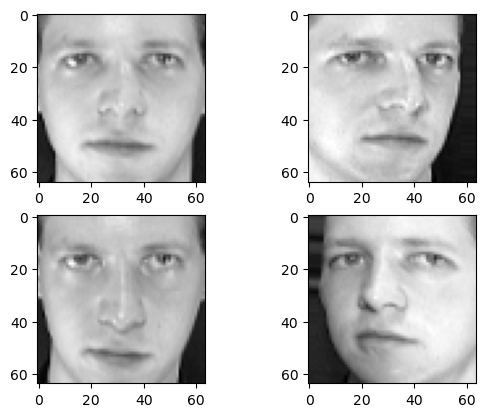

In [39]:
# this code showcases matplotlib subplots. The syntax is: plt.subplot(height, width, index_starting_from_1)
plt.subplot(2,2,1)
plt.imshow(data[0],cmap='gray')
plt.subplot(2,2,2)
plt.imshow(data[1],cmap='gray')
plt.subplot(2,2,3)
plt.imshow(data[2],cmap='gray')
plt.subplot(2,2,4)
plt.imshow(data[3],cmap='gray')

# Face reconstruction problem

Let's solve the face reconstruction problem: given left halves of facex __(X)__, our algorithm shall predict the right half __(y)__. Our first step is to slice the photos into X and y using slices.

__Slices in numpy:__
* In regular python, slice looks roughly like this: `a[2:5]` _(select elements from 2 to 5)_
* Numpy allows you to slice N-dimensional arrays along each dimension: [image_index, height, width]
  * `data[:10]` - Select first 10 images
  * `data[:, :10]` - For all images, select a horizontal stripe 10 pixels high at the top of the image
  * `data[10:20, :, -25:-15]` - Take images [10, 11, ..., 19], for each image select a _vetrical stripe_ of width 10 pixels, 15 pixels away from the _right_ side.

__Your task:__

Let's use slices to select all __left image halves as X__ and all __right halves as y__.

In [40]:
data.shape

(400, 64, 64)

In [41]:
# select left half of each face as X, right half as Y
X = data[:, :, :32]
y = data[:, :, 32:]

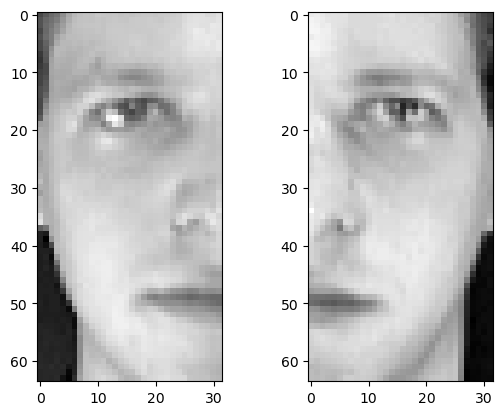

In [42]:
# If you did everything right, you're gonna see left half-image and right half-image drawn separately in natural order
plt.subplot(1,2,1)
plt.imshow(X[0],cmap='gray')
plt.subplot(1,2,2)
plt.imshow(y[0],cmap='gray')

assert X.shape == y.shape == (len(data), 64, 32), "Please slice exactly the left half-face to X and right half-face to Y"

Exception ignored in: <function tqdm.__del__ at 0x7f04bb878160>
Traceback (most recent call last):
  File "/home/vbva/.local/lib/python3.10/site-packages/tqdm/std.py", line 1148, in __del__
    self.close()
  File "/home/vbva/.local/lib/python3.10/site-packages/tqdm/notebook.py", line 279, in close
    self.disp(bar_style='danger', check_delay=False)
AttributeError: 'tqdm_notebook' object has no attribute 'disp'
Exception ignored in: <function tqdm.__del__ at 0x7f04bb878160>
Traceback (most recent call last):
  File "/home/vbva/.local/lib/python3.10/site-packages/tqdm/std.py", line 1148, in __del__
    self.close()
  File "/home/vbva/.local/lib/python3.10/site-packages/tqdm/notebook.py", line 279, in close
    self.disp(bar_style='danger', check_delay=False)
AttributeError: 'tqdm_notebook' object has no attribute 'disp'


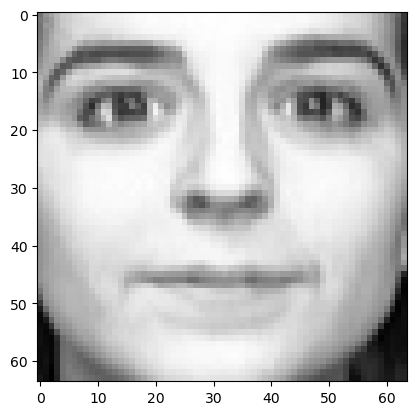

In [43]:
def glue(left_half,right_half):
    # merge photos back together
    left_half = left_half.reshape([-1, 64, 32])
    right_half = right_half.reshape([-1, 64, 32])
    return np.concatenate([left_half, right_half], axis=-1)


# if you did everything right, you're gonna see a valid face
plt.imshow(glue(X, y)[99], cmap='gray')

# Linear regression

Split __X__ and __y__ randomly into train and test. Use 95% of the objects for train and the rest 5% for test.

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.reshape(X.shape[0], -1), y.reshape(y.shape[0], -1), test_size = 0.05, random_state = 17)


print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(380, 2048) (380, 2048)
(20, 2048) (20, 2048)


Learn Linear Regression on train data. Use `LinearRegression` from `sklearn.linear_model`

In [45]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Compute measure mean squared error on train and test samples. Use `mean_squared_error` from `sklearn.metrics`

In [46]:
from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(y_train, model.predict(X_train))
mse_test = mean_squared_error(y_test, model.predict(X_test))

print("Train MSE:", mse_train)
print("Test MSE:", mse_test)

Train MSE: 3.1306893e-12
Test MSE: 0.010764427


## Why train error is much smaller than test?

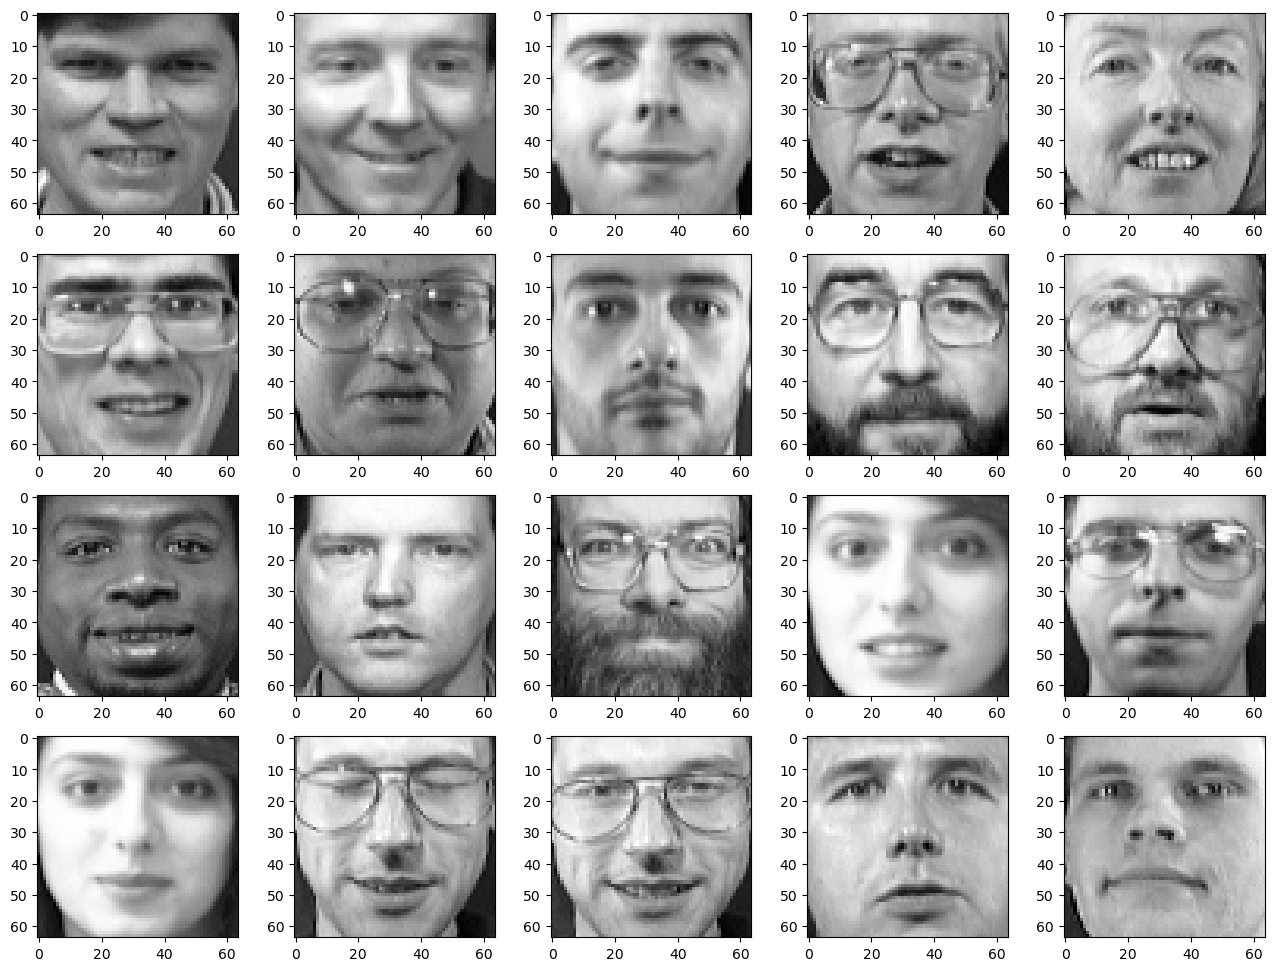

In [47]:
# Train predictions
pics = glue(X_train, model.predict(X_train)) # reconstruct and glue together X and predicted Y for the train dataset

plt.figure(figsize=[16, 12])
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(pics[i], cmap='gray')

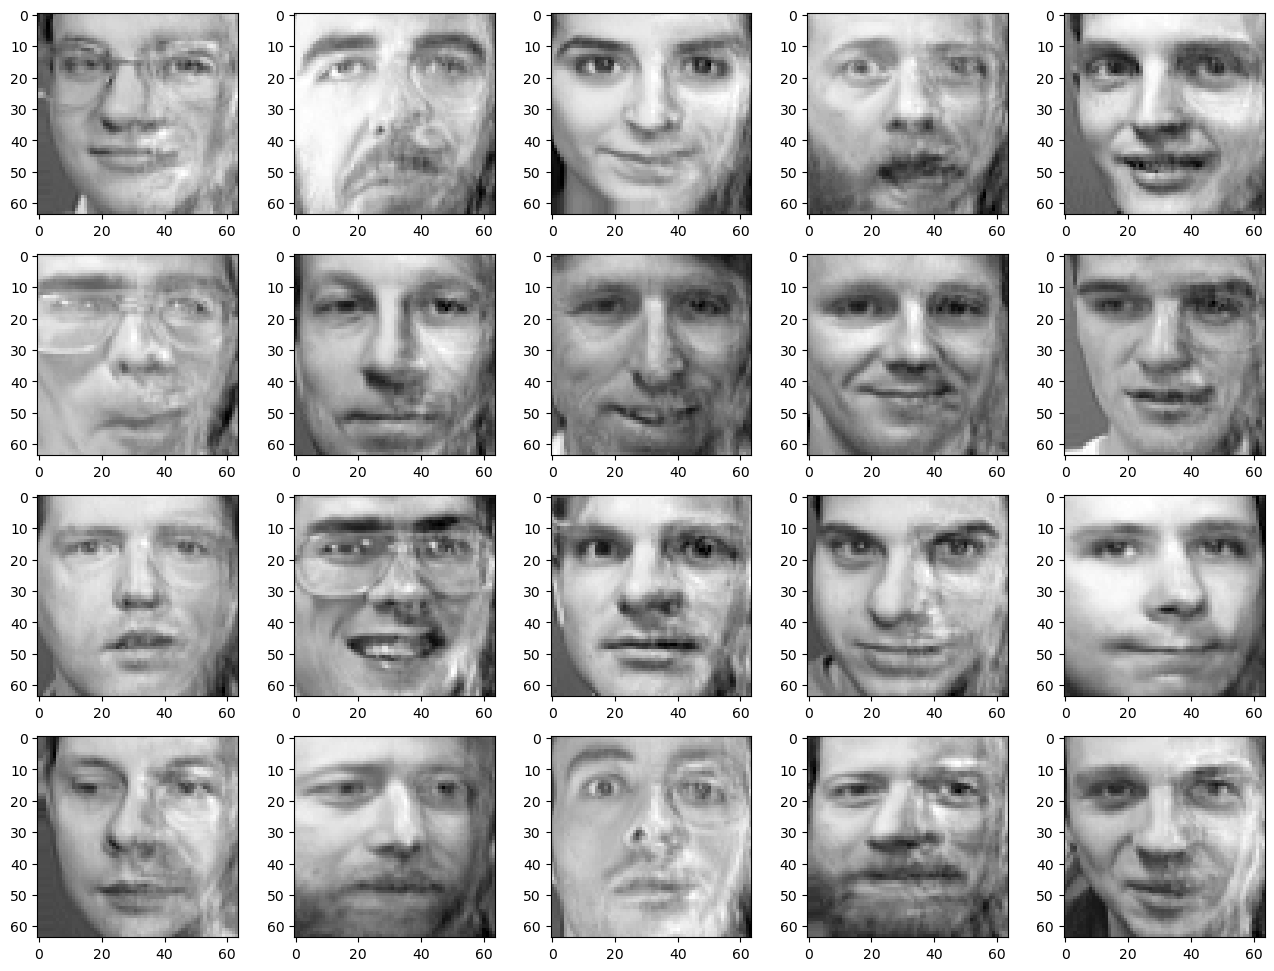

In [48]:
# Test predictions
pics = glue(X_test, model.predict(X_test)) # reconstruct and glue together X and predicted Y for the test dataset

plt.figure(figsize=[16, 12])
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(pics[i], cmap='gray')

### Regularisation

There are  many linear models in sklearn package, and all of them can be found [here](https://scikit-learn.org/stable/modules/linear_model.html). We will focus on 3 of them: Ridge regression, Lasso and ElasticNet.
Idea of all of them is very simple: add some penalty to the objective loss function to prevent overfitting.

# Ridge regression
RidgeRegression is just a LinearRegression, with l2 regularization - penalized for $ \alpha \cdot \sum _i w_i^2$

Let's train such a model with alpha=0.5

In [49]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.5)
ridge.fit(X_train, y_train)

Ridge(alpha=0.5)

In [50]:
from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(y_train, ridge.predict(X_train))
mse_test = mean_squared_error(y_test, ridge.predict(X_test))

print("Train MSE:", mse_train)
print("Test MSE:", mse_test)

Train MSE: 0.00042432116
Test MSE: 0.007832053


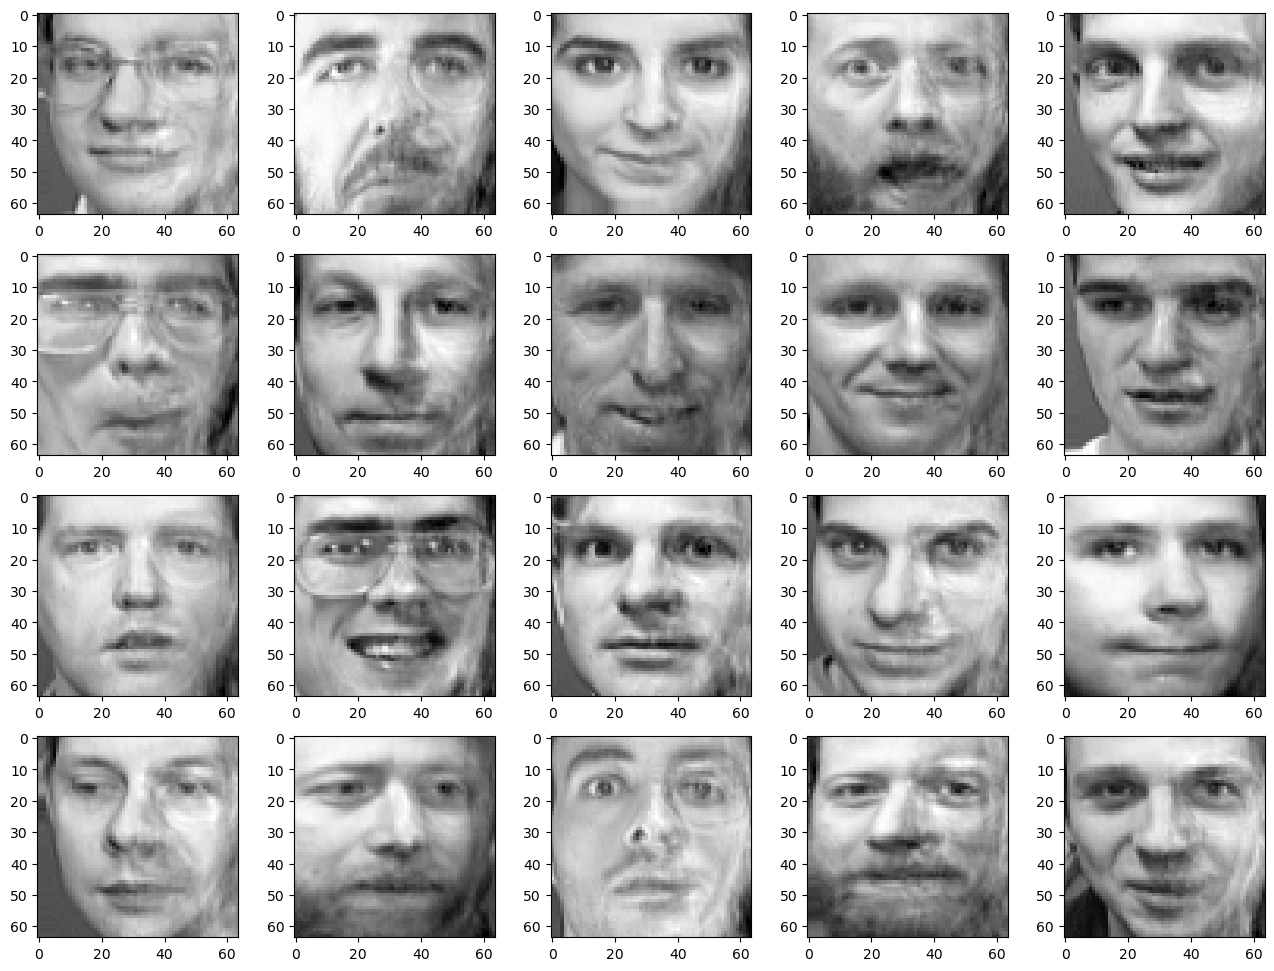

In [51]:
# Test predictions
pics = glue(X_test, ridge.predict(X_test)) # reconstruct and glue together X and predicted Y for the test dataset

plt.figure(figsize=[16, 12])
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(pics[i], cmap='gray')

# Lasso regression

Try to use `Lasso` Regression. Try to choose reasonable `alpha`

# Leave-one-out


In [ ]:
!pip install tqdm

In [70]:
from sklearn.model_selection import LeaveOneOut
from tqdm import tqdm

loo = LeaveOneOut()

alpha = 0.5
loss_values = []

for train_ids, val_ids in tqdm(loo.split(X_train), total=loo.get_n_splits(X_train)):
    curr_X_train = X_train[train_ids]
    curr_y_train = y_train[train_ids]
    
    curr_X_val = X_train[val_ids]
    curr_y_val = y_train[val_ids]

    ridge = Ridge(alpha = alpha)
    ridge.fit(curr_X_train, curr_y_train)

    y_pred = ridge.predict(curr_X_val)
    curr_loss = mean_squared_error(curr_y_val, y_pred)

    loss_values.append(curr_loss)
loss_values = np.array(loss_values)





  0%|                                                   | 0/380 [00:00<?, ?it/s]



  0%|                                           | 1/380 [00:00<00:50,  7.51it/s]



  1%|▏                                          | 2/380 [00:00<00:52,  7.25it/s]



  1%|▎                                          | 3/380 [00:00<00:51,  7.26it/s]



  1%|▍                                          | 4/380 [00:00<00:47,  7.94it/s]



  1%|▌                                          | 5/380 [00:00<00:44,  8.48it/s]



  2%|▋                                          | 6/380 [00:00<00:45,  8.20it/s]



  2%|▊                                          | 7/380 [00:00<00:45,  8.22it/s]



  2%|▉                                          | 8/380 [00:00<00:44,  8.43it/s]



  2%|█                                          | 9/380 [00:01<00:44,  8.32it/s]



  3%|█                                         | 10/380 [00:01<00:46,  7.94it/s]



  3%|█▏                                        | 11/380 [00:01<00:45,  8

In [71]:
loss_values.mean()

0.00983961

In [80]:
from sklearn.model_selection import KFold

kf = KFold(n_splits = 5)

def try_alpha(alpha):
  loss_values = []

  for train_ids, val_ids in kf.split(X_train):
    curr_X_train = X_train[train_ids]
    curr_y_train = y_train[train_ids]

    curr_X_val = X_train[val_ids]
    curr_y_val = y_train[val_ids]

    ridge = Ridge(alpha = alpha)
    ridge.fit(curr_X_train, curr_y_train)

    y_pred = ridge.predict(curr_X_val)
    curr_loss = mean_squared_error(curr_y_val, y_pred)

    loss_values.append(curr_loss)
  loss_values = np.array(loss_values)
  return loss_values.mean()


In [81]:
alpha_list = np.exp(np.linspace(-7, 5, 100) )
alpha_list

array([9.11881966e-04, 1.02939104e-03, 1.16204284e-03, 1.31178872e-03,
       1.48083151e-03, 1.67165789e-03, 1.88707499e-03, 2.13025167e-03,
       2.40476515e-03, 2.71465363e-03, 3.06447569e-03, 3.45937734e-03,
       3.90516772e-03, 4.40840460e-03, 4.97649076e-03, 5.61778297e-03,
       6.34171488e-03, 7.15893581e-03, 8.08146737e-03, 9.12288035e-03,
       1.02984943e-02, 1.16256030e-02, 1.31237287e-02, 1.48149094e-02,
       1.67240230e-02, 1.88791532e-02, 2.13120029e-02, 2.40583602e-02,
       2.71586249e-02, 3.06584033e-02, 3.46091783e-02, 3.90690673e-02,
       4.41036770e-02, 4.97870684e-02, 5.62028462e-02, 6.34453891e-02,
       7.16212375e-02, 8.08506612e-02, 9.12694285e-02, 1.03030803e-01,
       1.16307800e-01, 1.31295729e-01, 1.48215066e-01, 1.67314703e-01,
       1.88875603e-01, 2.13214933e-01, 2.40690736e-01, 2.71707189e-01,
       3.06720558e-01, 3.46245901e-01, 3.90864651e-01, 4.41233168e-01,
       4.98092390e-01, 5.62278739e-01, 6.34736419e-01, 7.16531311e-01,
      

In [82]:
results = []

for alpha in tqdm(alpha_list):
  loss = try_alpha(alpha)
  results.append((loss, alpha))

results = np.array(results)



100%|█████████████████████████████████████████| 100/100 [00:41<00:00,  2.40it/s]


Text(0, 0.5, 'loss')

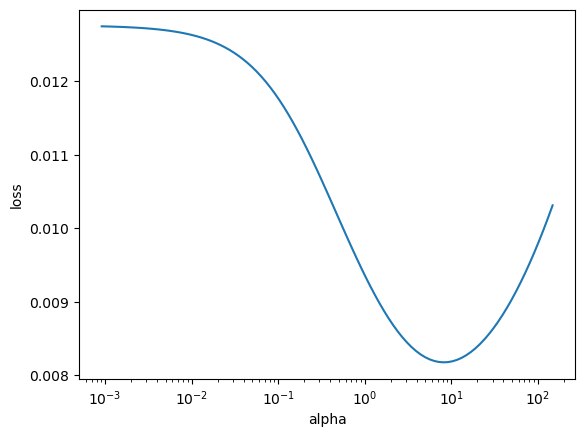

In [84]:
results[np.argmin(results[:, 0])]

plt.plot(results[:, 1], results[:, 0])
plt.xscale('log')

plt.xlabel('alpha')
plt.ylabel('loss')

In [95]:
from sklearn.model_selection import GridSearchCV



In [96]:
parameter_dict = {
    "alpha" : np.exp(np.linspace(-7, 5 , 100))
}

gscv = GridSearchCV(estimator = Ridge(), 
                    param_grid = parameter_dict, 
                    scoring = 'neg_mean_squared_error',
                    cv = 5)

In [97]:
gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([9.11881966e-04, 1.02939104e-03, 1.16204284e-03, 1.31178872e-03,
       1.48083151e-03, 1.67165789e-03, 1.88707499e-03, 2.13025167e-03,
       2.40476515e-03, 2.71465363e-03, 3.06447569e-03, 3.45937734e-03,
       3.90516772e-03, 4.40840460e-03, 4.97649076e-03, 5.61778297e-03,
       6.34171488e-03, 7.15893581e-03, 8.08146737e-03, 9....
       9.13507328e+00, 1.03122585e+01, 1.16411409e+01, 1.31412689e+01,
       1.48347099e+01, 1.67463750e+01, 1.89043856e+01, 2.13404869e+01,
       2.40905147e+01, 2.71949230e+01, 3.06993789e+01, 3.46554342e+01,
       3.91212840e+01, 4.41626226e+01, 4.98536099e+01, 5.62779626e+01,
       6.35301853e+01, 7.17169609e+01, 8.09587199e+01, 9.13914122e+01,
       1.03168506e+02, 1.16463248e+02, 1.31471208e+02, 1.48413159e+02])},
             scoring='neg_mean_squared_error')

In [99]:
gscv.best_params_

{'alpha': 8.092268429068358}

Text(0, 0.5, 'loss')

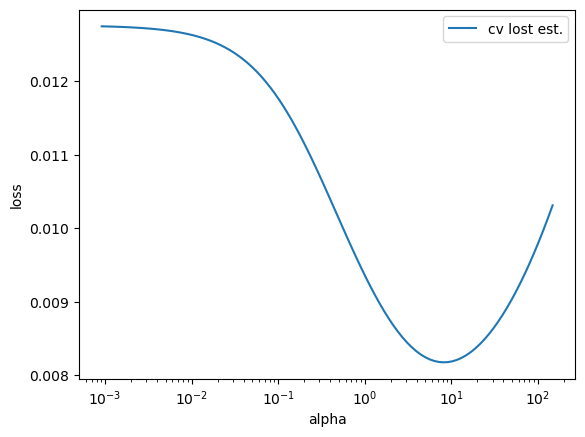

In [100]:
plt.plot(gscv.cv_results_['param_alpha'], -gscv.cv_results_['mean_test_score'], label = 'cv lost est.')
plt.xscale('log')
plt.legend()

plt.xlabel('alpha')
plt.ylabel('loss')